# Vehicle Price Prediction

#### Estimate the selling price of cars based on the features of car

In [1]:
#Required libraries for reading, analysing and visualizing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

## Data Analysis

In [2]:
#reading data from the csv file
df = pd.read_csv('C:/Users/ANKIT/Desktop/Vehicle Price Prediction/details.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
 df.dropna(inplace=True)

## Data Visualization

### Fuel Type Vs Selling Price

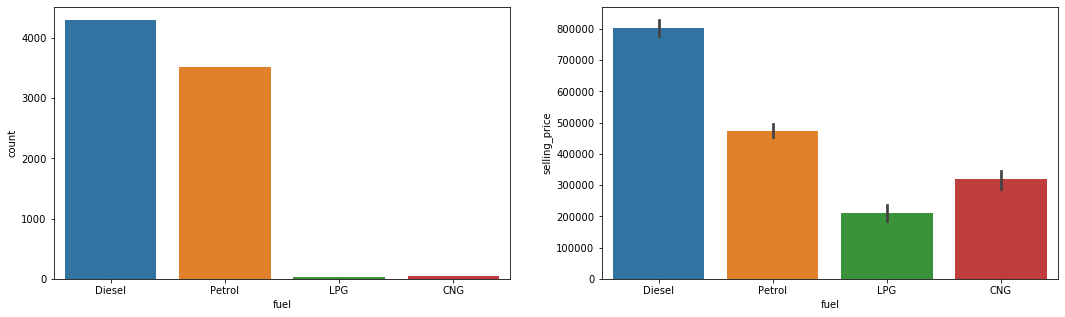

In [8]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'fuel', data = df, ax = axis1)
sns.barplot(x = 'fuel', y = 'selling_price', data = df, ax = axis2);

### Transmission Vs Selling Price

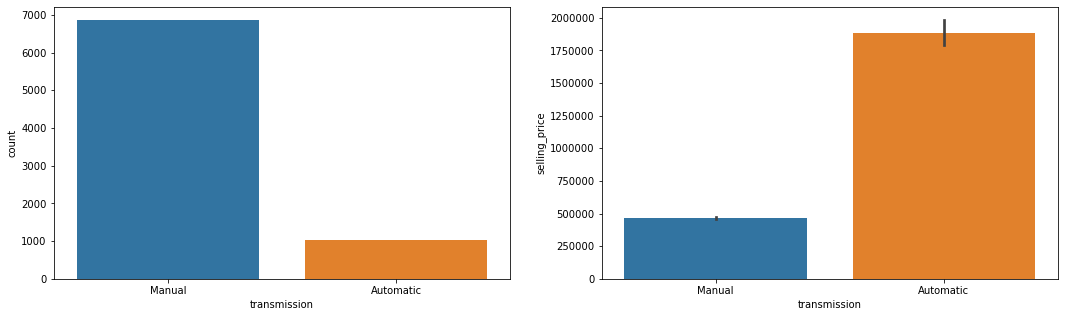

In [9]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'transmission', data = df, ax = axis1)
sns.barplot(x = 'transmission', y = 'selling_price', data = df, ax = axis2);

### Seller Vs Selling Price

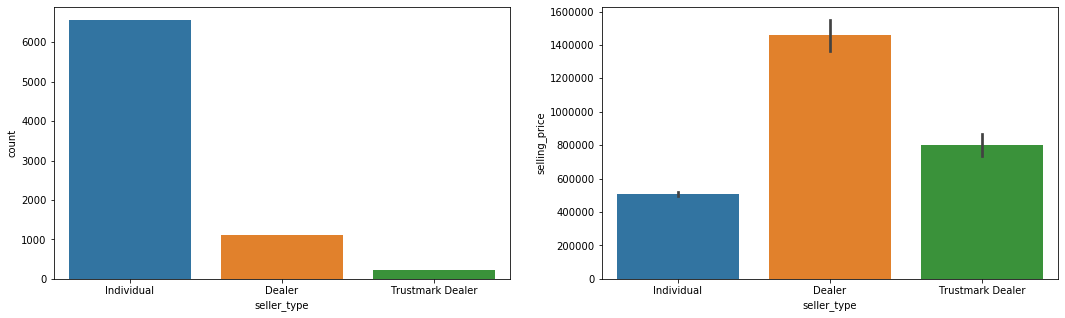

In [10]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'seller_type', data = df, ax = axis1)
sns.barplot(x = 'seller_type', y = 'selling_price', data = df, ax = axis2);

### Year Vs Selling Price

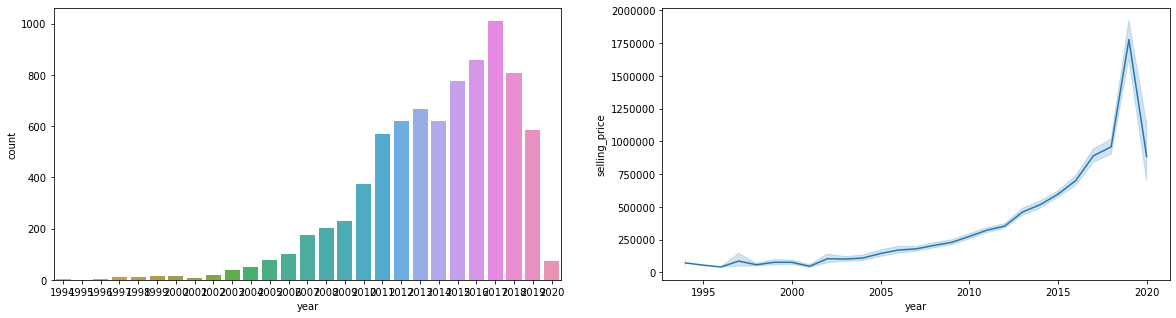

In [11]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'year', data = df, ax = axis1)
sns.lineplot(x = 'year', y = 'selling_price', data = df, ax = axis2);

### KM Driven vs Selling Price

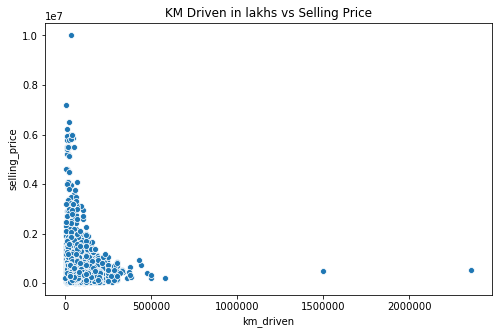

In [12]:
plt.figure(figsize = [8,5])
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df);
plt.title('KM Driven in lakhs vs Selling Price');

### Owner Vs Selling Price

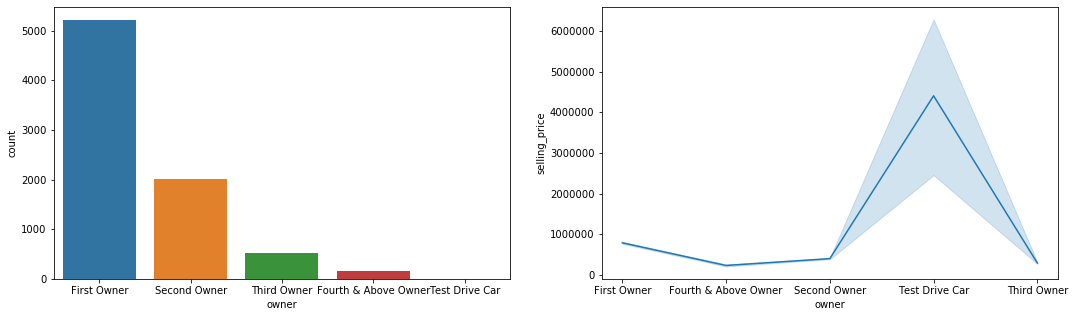

In [13]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'owner', data = df, ax = axis1)
sns.lineplot(x = 'owner', y = 'selling_price', data = df, ax = axis2);

In [14]:
# Selling Price Vs Fuel Type

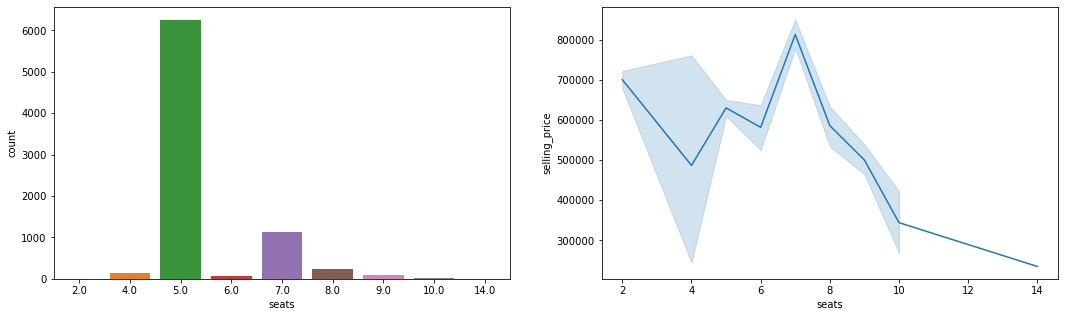

In [15]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'seats', data = df, ax = axis1)
sns.lineplot(x = 'seats', y = 'selling_price', data = df, ax = axis2);

In [16]:
df.drop(['name', 'torque'], axis = 1, inplace = True)

In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


## Preprocessing of Data

In [18]:
z = lambda x: float(str(x).split(' ')[0])
df['mileage'] = df['mileage'].apply(z)

In [19]:
z = lambda x: float(str(x).split(' ')[0])
df['engine'] = df['engine'].apply(z)

In [20]:
z = lambda x: float(str(x).split(' ')[0])
df['max_power'] = df['max_power'].apply(z)

In [21]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [22]:
df['current_year'] = 2020

In [23]:
df['no_years'] = df['current_year'] - df['year']

In [24]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,current_year,no_years
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2020,6
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2020,6
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,2020,14
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2020,10
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,2020,13


In [25]:
df.drop(['year'], axis=1, inplace=True)

In [26]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,current_year,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2020,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2020,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,2020,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2020,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,2020,13


In [27]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [28]:
df.drop(['current_year'], axis=1, inplace=True)

In [29]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,13


In [30]:
final_df = pd.get_dummies(df,drop_first=True)

In [31]:
final_df.corr()

,selling_price,km_driven,mileage,engine,max_power,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617,-0.412302,0.204831,-0.035978,-0.195074,-0.386151,0.032779,-0.590269,-0.073601,-0.178786,0.116081,-0.115113
km_driven,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259,0.428548,0.271662,0.023095,-0.274460,0.202851,-0.083181,0.201186,0.089244,0.209913,-0.024168,0.148795
mileage,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700,-0.328544,0.060256,-0.013924,-0.074927,0.011862,-0.036248,0.178986,-0.072118,-0.101811,-0.015644,-0.097455
engine,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103,-0.018263,0.507383,-0.056681,-0.491189,-0.132215,0.038690,-0.283206,-0.006433,0.020809,0.013954,-0.004743
max_power,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999,-0.226598,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
seats,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000,0.007923,0.354764,-0.028949,-0.345399,0.081197,-0.028106,0.072722,0.007845,0.033751,-0.010921,0.005175
no_years,-0.412302,0.428548,-0.328544,-0.018263,-0.226598,0.007923,1.000000,-0.037536,0.059887,0.034351,0.243729,-0.100385,0.249002,0.205631,0.317328,-0.032661,0.271317
fuel_Diesel,0.204831,0.271662,0.060256,0.507383,0.304787,0.354764,-0.037536,1.000000,-0.072800,-0.978020,0.003567,-0.140763,0.025579,-0.009021,0.051721,-0.017362,-0.007567
fuel_LPG,-0.035978,0.023095,-0.013924,-0.056681,-0.060175,-0.028949,0.059887,-0.072800,1.000000,-0.059739,0.025092,-0.011697,0.025967,0.003946,0.013442,-0.001678,0.021268
fuel_Petrol,-0.195074,-0.274460,-0.074927,-0.491189,-0.286090,-0.345399,0.034351,-0.978020,-0.059739,1.000000,-0.012914,0.144956,-0.034257,0.008609,-0.055230,0.017957,0.006146


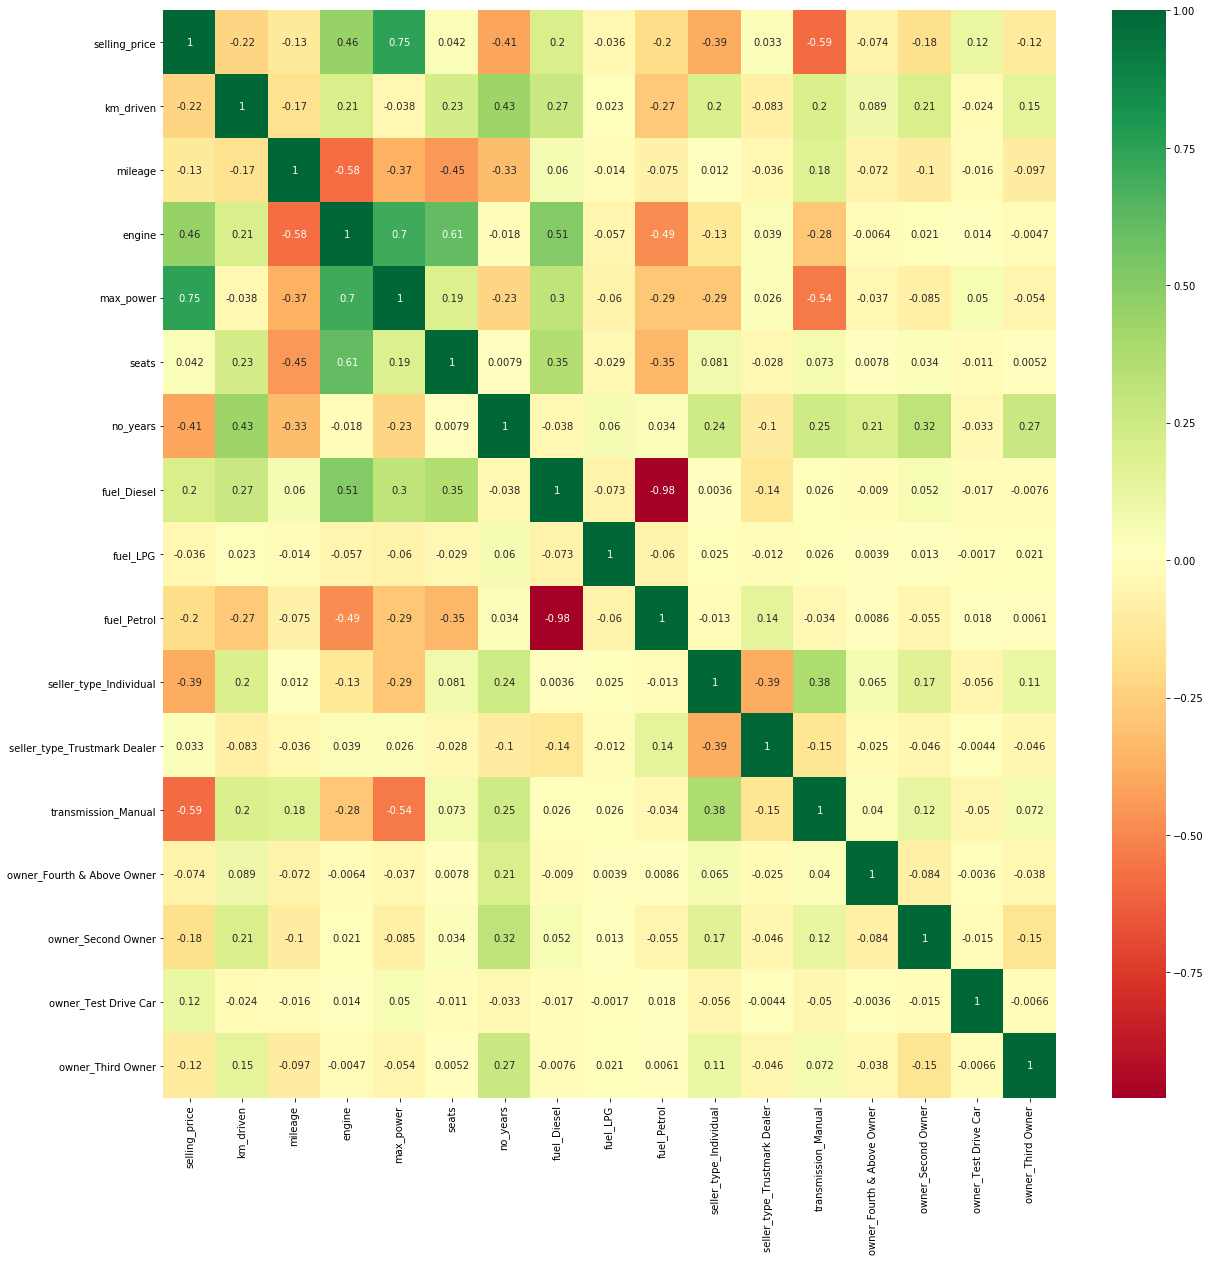

In [32]:
corrmap = final_df.corr()
top_corr = corrmap.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_df[top_corr].corr(),annot=True, cmap='RdYlGn')

In [33]:
final_df.head()

,selling_price,km_driven,mileage,engine,max_power,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,13,0,0,1,1,0,1,0,0,0,0


## Model

In [34]:
X = final_df.iloc[:,1:]

In [35]:
y = final_df.iloc[:,0]

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [37]:
print(model.feature_importances_)

[4.58915882e-02 2.73760603e-02 9.19695793e-02 2.73387105e-01
 1.21492846e-02 1.60373124e-01 2.93476022e-02 5.36632678e-06
 2.01993786e-02 2.40414270e-02 1.48676458e-03 2.99276186e-01
 2.69404394e-04 8.22012194e-03 5.24266270e-03 7.64344467e-04]


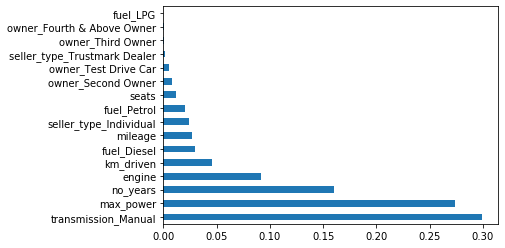

In [38]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(50).plot(kind='barh')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomForestRegressor()

In [41]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
# Use the random grid to search for best hyperparameters
# create base model to tune
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [45]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
y_pred = rf_random.predict(X_test)

In [47]:
rf_random.score(X_train, y_train)

-11435959973.105839

In [48]:
rf_random.score(X_test, y_test)

-17686250380.64798

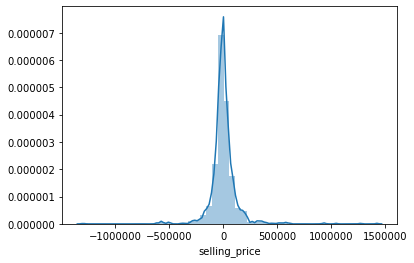

In [49]:
sns.distplot(y_test-y_pred)

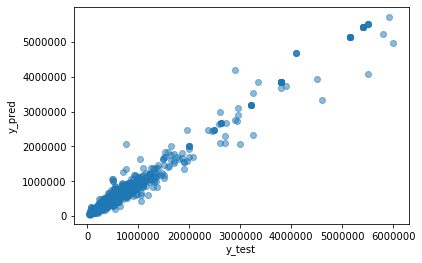

In [50]:
plt.scatter(y_test, y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [51]:
y_test[0:5]

3839    550000
8066    140000
7493    125000
1528    250000
2696    170000
Name: selling_price, dtype: int64

In [52]:
y_pred[0:5]

array([551300.26676702, 123087.58797619,  82625.16332462, 241186.30597571,
       176108.56666781])

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))
print('Variance Score:', metrics.explained_variance_score(y_test, y_pred))

MAE: 69830.93649643911
MSE: 17686250380.64798
RMSE: 132989.66268341301
Coefficient of Determination: 0.9735114915286157
Variance Score: 0.9735135158445363
